# Neural Network Classification: MNIST Dataset

이 노트북에서는 **MNIST 손글씨 숫자 (0~9)** 데이터셋을 활용하여 신경망 분류 모델을 학습합니다.

## 목표
1. 데이터 불러오기 및 전처리
2. Neural Network 모델 정의
3. 학습 및 학습 곡선 확인
4. 성능 평가 및 예측 시각화


In [9]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
import matplotlib as mpl
import warnings

# 사용 가능한 한글 폰트 찾기
def find_korean_font():
    korean_fonts = ['Apple SD Gothic Neo', 'Nanum Myeongjo', 'AppleGothic', 
                   'Malgun Gothic', 'NanumGothic', 'Noto Sans CJK KR']
    
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    
    for font in korean_fonts:
        if font in available_fonts:
            return font
    
    return 'DejaVu Sans'  # 기본 폰트

# 폰트 설정
selected_font = find_korean_font()
mpl.rcParams['font.family'] = selected_font
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

print(f"사용된 폰트: {selected_font}")

# 폰트 관련 경고 숨기기
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')

사용된 폰트: Apple SD Gothic Neo


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## 1. 데이터 불러오기

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("원본 데이터 shape:", X_train.shape, y_train.shape)

원본 데이터 shape: (60000, 28, 28) (60000,)


## 2. 데이터 전처리

In [12]:
# 0~255 픽셀값 → 0~1 정규화
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# (28,28) → (784,) 벡터화
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# One-hot 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("전처리 후 shape:", X_train.shape, y_train.shape)

전처리 후 shape: (60000, 784) (60000, 10)


## 3. 모델 정의

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784,)),
    # TODO: 128개 뉴런, ReLU 활성화 함수
    tf.keras.layers.Dense(128, activation='relu'),
    # TODO: 128개 뉴런, ReLU 활성화 함수
    tf.keras.layers.Dense(128, activation='relu'),
    # TODO: 10개 뉴런, Softmax 활성화 함수
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## 4. 모델 컴파일

In [14]:
# TODO: Adam 옵티마이저, learning rate=0.001
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
# TODO: 손실함수: categorical_crossentropy (다중 클래스 분류)
# TODO: 평가지표: accuracy
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

## 5. 모델 학습

In [15]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
375/375 [==============================] - 1s 1ms/step - loss: 0.3565 - accuracy: 0.8985 - val_loss: 0.1748 - val_accuracy: 0.9502
Epoch 2/10
375/375 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9577 - val_loss: 0.1201 - val_accuracy: 0.9634
Epoch 3/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9717 - val_loss: 0.1146 - val_accuracy: 0.9650
Epoch 4/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9776 - val_loss: 0.1013 - val_accuracy: 0.9707
Epoch 5/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9829 - val_loss: 0.0926 - val_accuracy: 0.9732
Epoch 6/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.0875 - val_accuracy: 0.9742
Epoch 7/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0935 - val_accuracy: 0.9735
Epoch 

## 6. 학습 곡선 확인

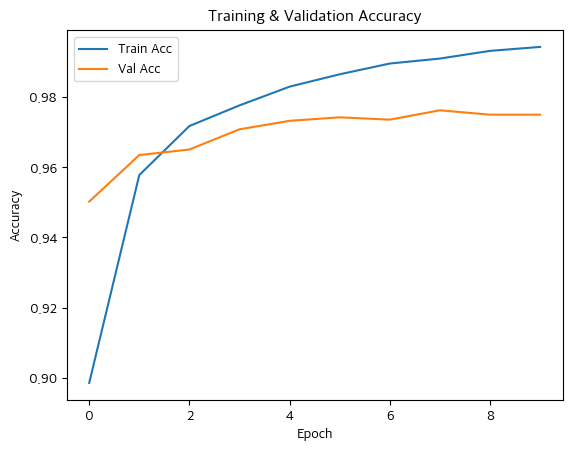

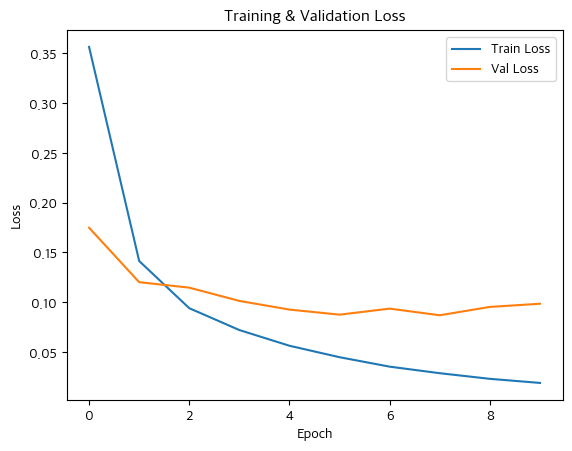

In [16]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

## 7. 모델 평가

In [17]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {acc:.3f}")

테스트 정확도: 0.975


## 8. 예측 예시 시각화

313/313 [==============================] - 0s 310us/step


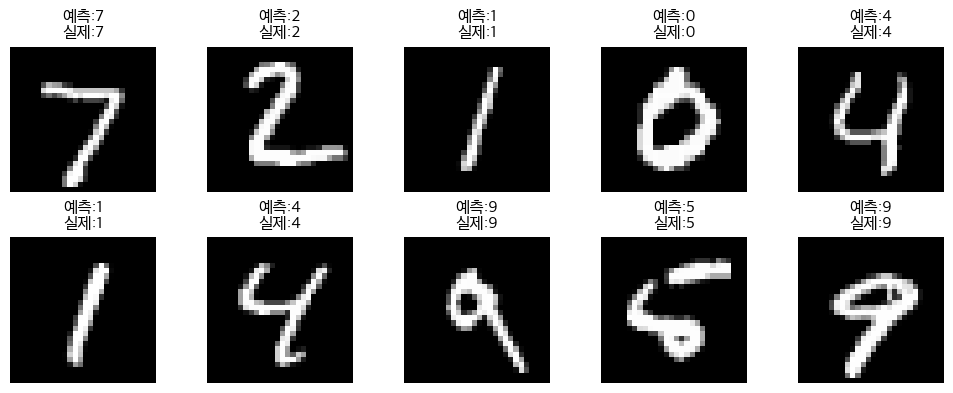

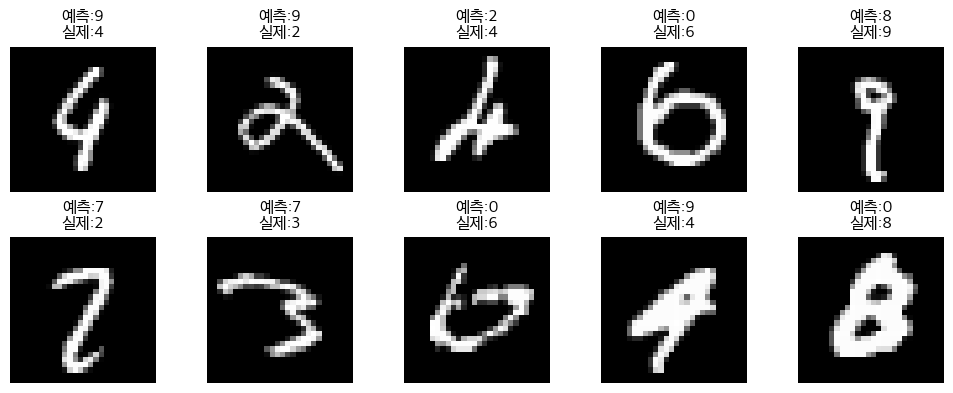

In [18]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

idx = 0
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i+idx].reshape(28,28), cmap="gray")
    plt.title(f"예측:{y_pred_classes[i+idx]}\n실제:{y_true[i+idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

failed = y_pred_classes != y_true
failed_idx = np.where(failed)[0]
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[failed_idx[i]].reshape(28,28), cmap="gray")
    plt.title(f"예측:{y_pred_classes[failed_idx[i]]}\n실제:{y_true[failed_idx[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


## 생각해보기
- Training/Validation Graph 에서 과적합(overfitting) 징후가 보이나?

과적합 징후가 보이지 않습니다.